In [15]:
# Initialize Otter
import otter
grader = otter.Notebook("project.ipynb")

# Project 1 – Gradebook 💯

## DSC 80, Spring 2023

### Checkpoint Due Date: Thursday, April 13th (Questions 1-4)
### Due Date: Thursday, April 20th

## Instructions

Welcome to Project 1! Be sure to read the instructions below carefully to understand how projects differ from labs.

### Working on the Project

This Jupyter Notebook contains the statements of the problems and provides code and Markdown cells to display your answers to the problems.

* Like the lab, your coding work will be developed in the accompanying `project.py` file, that will be imported into the current notebook. This code will be autograded.
* There is no manually-graded component to Project 1, so the only thing you will ever submit is `project.py`.
* **For the Checkpoint, which is required, you only need to turn in a `project.py` containing solutions for Questions 1-4!**
    - The "Project 1 Checkpoint" autograder on Gradescope does not thoroughly check your code – it only runs the public tests on Questions 1-4 to make sure that you have completed them. There are no hidden tests for the checkpoint, and you will see your score upon submission. 
    - When you submit the final version of the project, however, we will use hidden tests to check your answers more thoroughly.
    - Note that this means you will ultimately have to submit the project twice – once to the "Project 1 Checkpoint" autograder (Questions 1-4 only), and once to the "Project 1" autograder (once you're fully done).
- **Do not change the function names in the `project.py` file!** The functions in the `project.py` file are how your assignment is graded, and they are graded by their name. If you changed something you weren't supposed to, you can find the original code in the [course GitHub repository](https://github.com/dsc-courses/dsc80-2023-wi).
- **To ensure that all of your work to be submitted is in `project.py`, we've provided an additional uneditable notebook, called `project-validation.ipynb`, that contains only the tests and their setup. Make sure you are able to run it top-to-bottom without error before submitting!**
- You are encouraged to write your own additional helper functions to solve the project, as long as they also end up in `project.py`.


### Working with a Partner

You may work together on projects (and projects only!) with a partner. If you work with a partner, you are both required to actively contribute to all parts of the project. You must both be working on the assignment at the same time together, either physically or virtually on a Zoom call. You are encouraged to follow the pair programming model, in which you work on just a single computer and alternate who writes the code and who thinks about the problems at a high level.

In particular, you **cannot** split up the project and each work on separate parts independently.

Note that if you do work with a partner, you and your partner must submit the Checkpoint together and the whole project together. See [here](https://dsc80.com/syllabus/#projects) for more details.

In [16]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [17]:
import pandas as pd
import numpy as np
import os

In [29]:
from project import *

## About the Assignment

In this project, you'll work with the gradebook for CSD 18, a fictional data science course with 535 students co-taught by Professor Weiyue and Professor Praveen. You'll help Professors Weiyue and Praveen compute the total course grade for every student in their course and analyze their students' performances throughout the quarter.

---

### Navigating the Project

Click on the links below to navigate to different parts of the project. Note that Questions 1, 2, 3, and 4 constitute your Checkpoint submission.

- [Part 1: Enumerating the Assignments  🔢](#part1)
    - [✅ Question 1 (Checkpoint Question)](#Question-1-(Checkpoint-Question))
- [Part 2: Computing Project Grades 🧮](#part2)
    - [✅ Question 2 (Checkpoint Question)](#Question-2-(Checkpoint-Question))
- [Part 3: Computing Lab Grades 🧪](#part3)
    - [✅ Question 3 (Checkpoint Question)](#Question-3-(Checkpoint-Question))
    - [✅ Question 4 (Checkpoint Question)](#Question-4-(Checkpoint-Question))
    - [Question 5](#Question-5)
    - [Question 6](#Question-6)
- [Part 4: Putting It All Together 🧩](#part4)
    - [Question 7](#Question-7)
    - [Question 8](#Question-8)
- [Part 5: Time for Redemption 🙏](#part5)
    - [Question 9](#Question-9)
    - [Question 10](#Question-10)
    - [Question 11](#Question-11)
---

### The Syllabus

Professor Weiyue has taught this course several times, so the instructors decide to use his syllabus at the start of the quarter. (Note that this syllabus is **not** the same as the course syllabus for DSC 80 in Spring 2023 – luckily for you, exams are only worth 30% total in DSC 80 😊.)

* **Lab assignments (20% total)**
    - Each lab is worth the same amount, regardless of each lab's raw point total.
    - The lowest lab is dropped.
    - Each lab may be revised for up to (and including) one week after the deadline for a 10% penalty, for up to (and including) two weeks after the deadline for a 30% penalty, and beyond that for a 60% penalty. Such revisions are reflected in the `'Lateness'` columns in the gradebook.
    - Note that lateness penalties are not assessed for any other type of assignment – that is, students can submit projects, checkpoints, and discussions late without penalty.
* **Projects (30% total)** 
    - Each project consists of an autograded portion, and **possibly** a free response portion.
    - The total points for a single project consist of the sum of the raw score of the two portions.
    - Each project is worth the same amount, regardless of each project's raw point total.
* **Checkpoints (2.5% total)**
    - Each project checkpoint is worth the same amount, regardless of each project checkpoint's raw point total.
* **Discussions (2.5% total)**
    - Each discussion is worth the same amount, regardless of each discussion's raw point total.
* **Midterm Exam (15%)**
* **Final Exam (30%)**

You will need to refer to this syllabus repeatedly throughout the project, and several questions will link you back to it.

---

### Generalization

Your code only needs to work for courses that follow the syllabus above. That is, you may assume that the DataFrame `grades` looks **like** the given one in `data/grades.csv`.

However, your code should work regardless of:
- The numbers of labs, projects, discussions, and checkpoints in the course.
- The number of students in the course.

For instance, if CSD 18 is taught in a different quarter with more labs, fewer projects, and fewer students, your code should still work on a `grades.csv` from that quarter.

You may assume the course components and the naming conventions are as given in `grades.csv`, and you may assume that the course has no more than 99 of any type of assignment.

---

### Putting Everything Together

Here are a few remarks and tips for approaching Project 1, and projects more generally:

1. If you are having trouble figuring out what a question is asking you to do, look at the big picture and try to understand what the current step is doing to contribute to this big picture. This may clarify what's being asked!
1. These questions intentionally build off of each other and the final result matters! In fact, you can "get a question correct", but only receive partial credit for it because a previous answer was wrong.
    - Credit for a question will typically receive partial credit based on *how close* your answer is to correct (as well as some credit for a solution in the correct form). 
    - You should try to assess your answer to each question based on what you understand of the data. This might involve writing extensive code (that isn't turned in) just to check your work! Suggestions on checking your work are given in the assignment, but you should also think of your own ways of checking your work.
    - As you do this project, think about the data from the perspective of the student (which should be easy to do, since you've used Gradescope before!)
1. To test the correctness of your answers:
     - Once you have implemented a particular function in `project.py`, you should test out your function in the notebook. In particular, you should inspect/analyze the output to assess its correctness.
    - Run your functions on the main dataset (`grades`) and ask yourself if the output *looks correct.*
    - Run your functions on very small datasets (e.g. 1-5 row DataFrames that you construct by hand), calculate the expected output by hand, and see if the function output matches (this *is* unit-testing your code with data).
    * Run your functions on (large and small) samples of the dataset `grades`. Does your code break, or does it still run as expected?

Run the cell below to load in the aforementioned `grades` dataset.

In [38]:
grades_fp = os.path.join('data', 'grades.csv')
grades = pd.read_csv(grades_fp)
grades.head()


,PID,College,Level,lab01,lab01 - Max Points,lab01 - Lateness (H:M:S),lab02,lab02 - Max Points,lab02 - Lateness (H:M:S),project01,...,discussion07 - Lateness (H:M:S),discussion08,discussion08 - Max Points,discussion08 - Lateness (H:M:S),discussion09,discussion09 - Max Points,discussion09 - Lateness (H:M:S),discussion10,discussion10 - Max Points,discussion10 - Lateness (H:M:S)
0,A99706914,SI,JR,99.735279,100.0,00:00:00,84.990171,100.0,00:00:00,75.282632,...,00:00:00,8.895294,10,00:00:00,10.000000,10,780:01:28,10.000000,10,00:00:00
1,A99237411,TH,JR,98.829476,100.0,00:00:00,50.784231,100.0,00:00:00,52.929482,...,669:12:21,9.022407,10,00:00:00,9.020283,10,00:00:00,9.437368,10,00:00:00
2,A99690544,SI,SR,86.513369,100.0,00:00:00,47.802820,100.0,00:00:00,46.122801,...,00:00:00,3.030538,10,00:04:51,7.613698,10,00:00:00,9.624617,10,00:00:00
3,A99427381,TH,JR,100.000000,100.0,00:00:00,100.000000,100.0,00:00:00,79.121806,...,00:00:00,10.000000,10,00:00:00,9.249126,10,00:00:00,10.000000,10,00:00:00
4,A99489712,SI,JR,66.506974,100.0,00:00:00,33.422412,100.0,00:00:00,41.823703,...,00:00:00,4.439606,10,00:00:00,4.485291,10,00:00:00,6.282712,10,00:00:00


**Tip:** The `grades` DataFrame has 100 columns, and you can't see them all right now. To get a feel for what all of the columns represent, you might consider opening `grades.csv` with a spreadsheet application, like Google Sheets or Excel.

<a name='part1'></a>

## Part 1: Enumerating the Assignments 🔢

To start, you'll list out the names of each assignment in the course.

### ✅ Question 1 (Checkpoint Question)

<a name='Question-1-(Checkpoint-Question)'></a>


([return to the outline](#Navigating-the-Project))

Complete the implementation of the function `get_assignment_names`, which takes in a DataFrame like `grades` and returns a dictionary with the following structure:
- The keys are the general areas of [the syllabus](#The-Syllabus): `'lab'`, `'project'`, `'midterm'`, `'final'`, `'disc'`, and `'checkpoint'`.
- The values are **lists** that contain all the assignment names of that type. For example, the lab assignments all have names of the form `'labXX'` where `XX` is a zero-padded two digit number. If the class has 5 labs, the returned dictionary's value for the `'lab'` key should be `['lab01', 'lab02', 'lab03', 'lab04', 'lab05']`.

***Hint:*** 

- Note that some of the column names in the DataFrame contains the assignment name in the zero-padded fashion requested. You should use this to your advantange when creating the dictionary values.

In [20]:
print(get_assignment_names(grades))

{'lab': ['lab01', 'lab02', 'lab03', 'lab04', 'lab05', 'lab06', 'lab07', 'lab08', 'lab09'], 'project': ['project01', 'project02', 'project03', 'project04', 'project05'], 'midterm': ['Midterm'], 'final': ['Final'], 'disc': ['discussion01', 'discussion02', 'discussion03', 'discussion04', 'discussion05', 'discussion06', 'discussion07', 'discussion08', 'discussion09', 'discussion10'], 'checkpoint': ['project02_checkpoint01', 'project02_checkpoint02', 'project03_checkpoint01']}


In [21]:
grader.check("q1")

q1 results: All test cases passed!

<a name='part2'></a>

## Part 2: Computing Project Grades 🧮

Now you're ready to compute each student's overall grade on the first type of assignment – projects.

### ✅ Question 2 (Checkpoint Question)

<a name='Question-2-(Checkpoint-Question)'></a>

([return to the outline](#Navigating-the-Project))

Complete the implementation of the function `projects_total`, which takes in a DataFrame like `grades` and returns a Series containing the total project grade for each student for the entire quarter, according to [the syllabus](#The-Syllabus). The output Series should contain values between 0 and 1.

***Notes***:

- If a student didn't turn in a particular project, what should their grade for it be? 
- Some projects have free response components that you need to account for when calculating the total points earned by a student and the max points possible for that project.
    - For example lets say Tiffany got 82 points on the main portion of project 1 and 13 points on the free response portion. This means that her grade on project 1 would be calculated as follows:
    $$
        \text{Project 1 Grade} = \frac{82+13}{85+15} = .95
    $$
- Per [the syllabus](#The-Syllabus), students may submit projects (and checkpoints and discussions) late without penalty.
- Do not include scores on checkpoint assignments in your calculations.
- To check your work, try:
    1. Calculating the total project scores for a few types of students by hand.
    2. Calculating summary statistics for the whole class' performance on a few projects in particular and ensuring the results seem reasonable.

In [26]:
total = projects_total(grades)

In [30]:
grader.check("q2")

q2 results: All test cases passed!

<a name='part3'></a>

## Part 3: Computing Lab Grades 🧪

Now, you will clean and process the lab grades, which will involve a bit more work than was necessary for projects. To do this, you will develop functions that:
- identify late submissions (Questions 3 and 4), 
- compute normalized scores for each lab assignment, factoring in late penalties (Question 5), and 
- drop the lowest lab grade and compute a total lab score for each student (Question 6).

### ✅ Question 3 (Checkpoint Question)

<a name='Question-3-(Checkpoint-Question)'></a>

([return to the outline](#Navigating-the-Project))

Unfortunately, Gradescope sometimes experiences a delay in registering when an assignment is submitted during "periods of heavy usage" (i.e. near a submission deadline). For instance, let's say that 15 students submit their assignment at 11:59 PM, right before the deadline. In this case, Gradescope has trouble registering the 15 submissions at the same time. As a result, Gradescope registers these submissions one-by-one **after** the deadline over some period of time, and these submissions are **marked late despite being submitted on-time**. 

Your job is to identify when a student's lab assignment was actually submitted on time, even if Gradescope did not process it in time and marked it as late. To do this, it is helpful to know that in CSD 18:
* Late submissions are turned off, so students cannot submit assignments late on their own after the deadline.
* The only way that a student can make a late submission is by attending office hours and having a tutor submit for them.
* However, there are no office hours "just after" the deadline, since deadlines are at 11:59 PM and tutors are asleep by then 💤.
* As a result, **truly late submissions are not submitted within a few hours of a deadline, but are instead submitted later**.

Complete the implementation of the function `last_minute_submissions`, which takes in a DataFrame like `grades` and outputs a **Series, indexed by lab assignment, that contains the number of submissions that were turned in on time by students but were marked "late" by Gradescope for each lab**. For instance, if the value for the `'lab01'` index in your returned Series is 15, that should mean that 15 students submitted Lab 1 on time but were marked late by Gradescope.

***Notes:***

- You have to figure out what a truly late submission is by looking at the data and understanding the data generating process described above. This question is about "cleaning" a messy data recording process. There is some ambiguity in finding which submissions are truly late; you will make a best guess for **a threshold** by looking at this dataset.  All the submissions that occur before this **threshold time** are on-time submissions that are incorrectly marked as "late".

- There is no one correct value for the threshold; a range of threshold values will return the correct answer.

- This function only involves **labs**, do not look at any other assignments categories.

- If you're curious, this is not how Gradescope actually works.

***Hints:*** 

- At some point, you'll need to convert times of the form `'00:11:08'` into a more usable numeric form.
- Plot the distribution of number of submissions over time and use that to determine the threshold.

In [31]:
out = last_minute_submissions(grades)
out.index

AttributeError: 'NoneType' object has no attribute 'index'

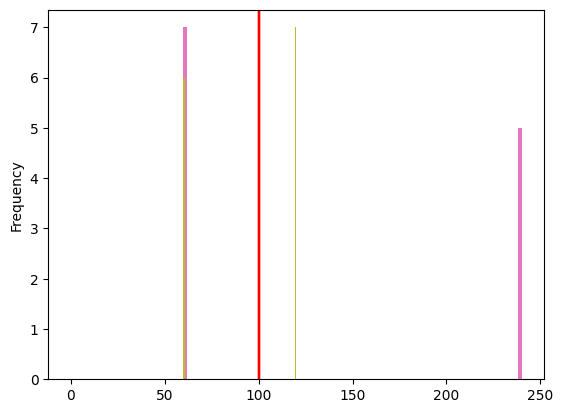

In [83]:
for lab in get_assignment_names(grades)['lab']:
    times = grades[lab + ' - Lateness (H:M:S)'].apply(hms_to_hours)
    # times = times[times < 1000]
    # times = times[times != 0]
    ax = times.plot.hist(bins=100)
    ax.axvline(100, color= 'red')

In [ ]:
grader.check("q3")

### ✅ Question 4 (Checkpoint Question)

<a name='Question-4-(Checkpoint-Question)'></a>

([return to the outline](#Navigating-the-Project))

Now you need to adjust lab grades to penalize truly late submissions. However, you need to take into account your investigation in the previous question, since students shouldn't be penalized by a bug in Gradescope!

Recall, per [the syllabus](#The-Syllabus), depending on how late a student **truly** submitted a lab, they will receive a penalty of 0% (on time), 10%, 30%, or 60%. To adjust their grade, then, we will either multiply their lab score by `1` (on time), `0.9`, `0.7`, or `0.4`. We'll call these four numbers – `1`, `0.9`, `0.7`, and `0.4` – "lateness multipliers."

Complete the implementation of the function `lateness_penalty`, which takes in a Series containing information on how late each student turned in a particular lab, such as `grades['lab01 - Lateness (H:M:S)']`, and returns a Series containing each student's lateness multiplier for that lab. The only possible values in the returned Series should be `1.0`, `0.9`, `0.7`, and `0.4`.

**Only truly late submissions should be counted as late**. Remember, we will only be enforcing late penalties for labs, not for any other assignment category.

In [ ]:
grader.check("q4")

### Question 5

([return to the outline](#Navigating-the-Project))

Complete the implementation of the function `process_labs`, which takes in a DataFrame like `grades` and returns a DataFrame of processed lab scores. The returned DataFrame should:
* have the same index as `grades`,
* have one column for each lab assignment (e.g. `'lab01'`, `'lab02'`,..., `'lab09'`),
* have values representing the final score for each lab assignment, adjusted for lateness and **normalized** to a score between 0 and 1.

***Note:*** If a student does not turn in a lab, their score for that lab is a 0.

In [ ]:
grader.check("q5")

### Question 6

([return to the outline](#Navigating-the-Project))

Complete the implementation of the function `lab_total`, which takes in a DataFrame returned by `process_labs` – that is, a DataFrame that contains each student's score on each lab after lateness penalties – and returns a Series containing the total lab grade for each student according to [the syllabus](#The-Syllabus) (i.e. with the lowest lab dropped). All values in the returned Series should be proportions between 0 and 1. 

For example, if CSD 18 only has 3 labs, and Aishani received lab scores of 20%, 90%, and 100% after lateness penalties, then your output Series should contain the value `0.95` for Aishani. This is because we drop the lowest score, and then compute the average of just 90% and 100%, which is 95%, or 0.95 as a proportion.

In [ ]:
grader.check("q6")

<a name='part4'></a>

## Part 4: Putting It All Together 🧩

It's time to compute the letter grade of each student in CSD 18.

### Question 7

([return to the outline](#Navigating-the-Project))

First, you need to compute each student's course grade, which results from adding their total grades in each course component according to the weights given in [the syllabus](#The-Syllabus).

Complete the implementation of the function `total_points`, which takes in a DataFrame like `grades` and returns a Series containing each student's course grade. **Course grades should be proportions between 0 and 1.**

***Notes***: 

- Don't repeat yourself when computing the checkpoint and discussion portions of the course.
- Remember, only the lab portion of the course accounts for late assignments; you may assume all assignments in other portions are turned in without penalty.
- Do the work by hand for a few students to check your code!

In [ ]:
grader.check("q7")

### Question 8

([return to the outline](#Navigating-the-Project))

How well did the students in CSD 18 do?

#### `final_grades`

Complete the implementation of the function `final_grades`, which takes in a Series of final course grades (as computed by `total_points` in Question 7) and returns a Series of letter grades as determined by the following cutoffs:

| Letter Grade | Cutoff |
|:--- | --- |
| A | grade >= 0.9 |
| B | 0.8 <= grade < 0.9 |
| C | 0.7 <= grade < 0.8 |
| D | 0.6 <= grade < 0.7 |
| F | grade < 0.6 |

***Note:*** These cutoffs do not have pluses or minuses. Do not round anyone's course grade when determining their letter grade.

<br>

#### `letter_proportions`

Complete the implementation of the function `letter_proportions`, which takes in a Series of final course grades (as computed by `total_points` in Question 7) and returns a Series containing the proportion of the class that received each letter grade. For instance, this Series might tell us that the proportion of the class receiving B's was 0.45, A's was 0.33, C's was 0.16, D's was 0.05, and F's was 0.01 (though these are made up numbers). The index of this Series should be letters, and the **values should be sorted in decreasing order**.

***Notes***: 

- The values in your returned Series should add up to exactly `1.0`. If you are getting something close such as `0.99999`, that means there is an issue with your code in a function you implemented earlier.
- **Do not round**.
- To check your work, verify the course grade distribution and relevant statistics! 

In [ ]:
grader.check("q8")

<a name='part5'></a>
## Part 5: Time for Redemption 🙏

The syllabus we've used so far was put together by Professor Weiyue, who has taught CSD 18 for several iterations. This was Professor Praveen's first time teaching CSD 18, and towards the end of the quarter he proposed a new idea to reward students for showing an improvement in their understanding of the earlier ideas in the course on the final exam. Specifically, here's what he proposed:

- The instructors will identify the questions on the final exam that contain content that was also covered on the midterm exam. Call these "redemption questions."
- For each student, compute their "raw redemption score", which is the proportion of points available on redemption questions that they earned. If they did not take the final exam, their raw redemption score is 0.
- Convert the class' raw redemption scores to z-scores, i.e. to standard units.
- Convert the class' original midterm exam grades, as proportions, to z-scores.
- If a student's raw redemption z-score is higher than their original midterm exam z-score, replace their original midterm exam score with one that has a z-score equal to their raw redemption z-score. This is done by converting their raw redemption z-score back to a midterm grade proportion using the standard deviation and mean of the midterm exam.
- If not, leave their original midterm exam score as-is. **Note that this policy can only increase a student's midterm exam score (and, hence, their total course grade), not decrease!**

As a refresher from [DSC 10](https://dsc-courses.github.io/dsc10-2022-fa/resources/lectures/lec21/lec21.html#Standard-units), to convert a sequence of numbers to z-scores, or standard units, we use the following formula:

$$z(x_i) = \frac{x_i - \text{mean of } x}{\text{SD of }x}$$

To illustrate this redemption policy, let's look at a concrete example.

- Suppose the final exam was worth 80 points. 55 of these points came from Questions 2, 4, 6, 8, and 9, which were the redemption questions. The class' mean score on just the redemption questions was 0.8, with a standard deviation of 0.15.
- Suppose the midterm exam was worth 70 points. The class' mean score on the midterm exam was 0.6, with a standard deviation of 0.25.
- Yuxin, a student in the course, earned a $\frac{74}{80}$ on the final exam, including a $\frac{51}{55}$ on the redemption questions, and a $\frac{53}{70}$ on the midterm exam. Then:
    - Her raw redemption score is $\frac{51}{55}$, and her redemption z-score is $\frac{\frac{51}{55} - 0.8}{0.15} \approx 0.8485$.
    - Her midterm z-score is $\frac{\frac{53}{70} - 0.6}{0.25} \approx 0.6286$.
    - Since her redemption z-score, $0.8485$, is greater than her midterm z-score, $0.6286$, her midterm exam score of $\frac{53}{70} \approx 0.7571$ will be replaced with:
    
    $$\text{Yuxin's redemption z-score} \cdot \text{class' midterm SD} + \text{class' midterm mean} \approx 0.8485 \cdot 0.25 + 0.6 = \boxed{0.8121}$$

Now, your job will be to implement this redemption policy and re-compute each student's total course points. Before proceeding, you should think about _why_ Professor Praveen has chosen to implement the redemption policy in terms of z-scores, rather than in terms of raw scores.

A few more things to consider:
- We rounded in the example above, but you should not round at any point in this part.
- After redemption, midterm exam grades should be capped at 1 (as a proportion), i.e. 100%.

It turns out that CSVs like `grades.csv` don't actually contain all of the information you'll need to implement this policy. For instance, `grades` only contains each student's total final exam grade, but not the number of points they earned on each question.

That information will come from another source. For the students whose grades are in `grades`, the CSV `data/final_exam_breakdown.csv` contains the number of points each student earned on each question of CSD 18's final exam. Run the cell below to load this CSV in as a DataFrame named `final_breakdown`.

In [ ]:
final_breakdown_fp = os.path.join('data', 'final_exam_breakdown.csv')
final_breakdown = pd.read_csv(final_breakdown_fp)
final_breakdown.head()

Note that `final_breakdown` has the same number of rows as `grades`, but a different number of columns:

In [ ]:
final_breakdown.shape

Also note that student `'A99381181'` has a score of `NaN` for each question because they did not take the final exam:

In [ ]:
grades.loc[grades['PID'] == 'A99381181', 'Final']

### Question 9

([return to the outline](#Navigating-the-Project))

Let's get started.

#### `raw_redemption`

Complete the implementation of the function `raw_redemption`, which takes in a DataFrame like `final_breakdown` and a list of integers, corresponding to the question numbers for "redemption questions." The function should return a DataFrame with two columns:
- `'PID'`, the PID for each student in `final_breakdown`.
- `'Raw Redemption Score'`, which is the proportion of points each student earned, when only considering redemption questions.

For example, suppose `example_breakdown` is as follows:

<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th></th>
      <th>PID</th>
      <th>Question 1 (6.0 pts)</th>
      <th>Question 2 (3.0 pts)</th>
      <th>Question 3 (1.0 pts)</th>
      <th>Question 4 (4.5 pts)</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th>0</th>
      <td>A99706914</td>
      <td>6</td>
      <td>3</td>
      <td>1</td>
      <td>4.5</td>
    </tr>
    <tr>
      <th>1</th>
      <td>A99237411</td>
      <td>2</td>
      <td>0</td>
      <td>1</td>
      <td>4.5</td>
    </tr>
    <tr>
      <th>2</th>
      <td>A99489712</td>
      <td>4</td>
      <td>1</td>
      <td>0</td>
      <td>4.0</td>
    </tr>
  </tbody>
</table>

`raw_redemption(example_breakdown, [1, 3])` should return the following DataFrame:

<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th></th>
      <th>PID</th>
      <th>Raw Redemption Score</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th>0</th>
      <td>A99706914</td>
      <td>1.000000</td>
    </tr>
    <tr>
      <th>1</th>
      <td>A99237411</td>
      <td>0.428571</td>
    </tr>
    <tr>
      <th>2</th>
      <td>A99489712</td>
      <td>0.571429</td>
    </tr>
  </tbody>
</table>



***Notes:***
- **Assume that for each question in `final_breakdown`, at least one student received a perfect score.**
- Assume that the input DataFrame will be in the same format as `final_breakdown`, in that the column at position 0 will be labeled `'PID'`, the column at position 1 will contain scores for Question 1, the column at position 2 will contain scores for Question 2, and so on.
- If a student didn't take the final, their raw redemption score should be 0.
- Again, do not round.

<br>

#### `combine_grades`

Then, complete the implementation of the function `combine_grades`, which takes in a DataFrame like `grades` and a DataFrame like the one returned by `raw_redemption`. The function should return a new DataFrame with all the columns from `grades`, plus a new column labelled `'Raw Redemption Score'` which contains the raw redemption score for each student.

***Hint:*** We cannot directly add the `'Raw Redemption Score'` from the redemption DataFrame to the `grades` DataFrame, as the `'PID'` columns in the two DataFrames won't necessarily match. Instead, you'll have to use a method that we plan to cover in Week 3; see the titles of the lectures in that week for a hint.

In [ ]:
grader.check("q9")

For our particular offering of CSD 18, the redemption questions on the final exam were Questions 1, 2, 3, 7, 9, and 12. Run the cell below to define a new DataFrame named `grades_combined` that results from calling the above two functions on grades from this class.

In [ ]:
grades_combined = combine_grades(grades, raw_redemption(final_breakdown, [1, 2, 3, 7, 9, 12]))
grades_combined.head()

### Question 10

([return to the outline](#Navigating-the-Project))

Now that we have all of our information about each student in one DataFrame, we can compute their z-score on both the original midterm exam and the redemption questions on the final exam.

#### `z_score`

Complete the implementation of the function `z_score`, which takes in a Series of numbers and returns a Series in which all elements are converted to z-scores. As a reminder, to convert a sequence of numbers to z-scores, or standard units, we use the following formula:

$$z(x_i) = \frac{x_i - \text{mean of } x}{\text{SD of }x}$$

***Notes:***

- Make sure to set the `ddof=0` in whichever method or function you use to compute standard deviation. `numpy` and `pandas` both use different default denominators when computing standard deviation. (`ddof=0` computes the "population" standard deviation and `ddof=1` computes the "sample" standard deviation.)
- Do **not** fill null values – that is, if a value in the input Series is `NaN`, its value in the output Series should also be `NaN`. (Depending on how you implement `z_score`, this may happen automatically.)
    - For midterm scores you should be handling null values in the next function not this one.

<br>

#### `add_post_redemption`

Complete the implementation of the function `add_post_redemption`, which takes in a DataFrame like `grades_combined` and returns a DataFrame with all the columns from `grades_combined` in addition to two new columns:
- `'Midterm Score Pre-Redemption'`, which contains each student's midterm exam score as a proportion between 0 and 1 **before** redemption.
- `'Midterm Score Post-Redemption'`, which containing each student's midterm exam score **after** the redemption policy has been applied, again as a proportion between 0 and 1.

You can use your `z_score` function to compute the z-scores of each student's original midterm exam grades and raw redemption scores. Note that there are students who didn't take the midterm, who need to have their `NaN` scores fixed *prior to calculating their z-scores* (or else you will end up with `NaN` z-scores which does not represent 0 in this case). None of the redemption z-scores should be `NaN`, since you handled null values in your implementation of `raw_redemption`.

If it's not clear, **computing the `'Midterm Score Post-Redemption'` column is the most complicated part of this question**. Make sure you understand how the redemption policy for CSD 18 works before approaching this question. If you need to refresh your understanding, re-read the instructions at the start of [Part 5](#part5).

In [ ]:
grader.check("q10")

### Question 11

([return to the outline](#Navigating-the-Project))

Now, we're equipped to recompute each student's course grade after the redemption policy.

#### `total_points_post_redemption`

Complete the implementation of the function `total_points_post_redemption`, which takes in a DataFrame like `grades_combined` and returns a Series containing each student's course grade after redemption. As a refresher, **course grades should be proportions between 0 and 1.**

You should not have to repeat any of your calculations for assignments other than the midterm exam – use your output from `total_points` and adjust it. Remember that, per [the syllabus](#The-Syllabus), the midterm exam is worth 15%.

<br>

#### `proportion_improved`

Finally, complete the implementation of the function `proportion_improved`, which takes in a DataFrame like `grades_combined` and returns the **proportion of students in the class whose letter grade increased** due to the redemption policy.

***Hints***:
- If you've implemented everything correctly, `proportion_improved(grades_combined)` should evaluate to a proportion between 0.07 and 0.12.
- Remember, it is impossible for a student's letter grade to decrease due to the redemption policy.

In [ ]:
grader.check("q11")

Great! Thanks to your implementation of the redemption policy, a sizeable fraction of CSD 18 students saw their letter grades improve.

## Congratulations, you've finished Project 1! 🎉

As a reminder, all of the work you want to submit needs to be in `project.py` – this notebook should not be uploaded because there are no manually-graded questions in this project.

To verify that all of your work is indeed in `project.py`, and that you didn't accidentally implement a function in this notebook and not in `project.py`, we've included another notebook in the project folder, called `project-validation.ipynb`. `project-validation.ipynb` is a version of this notebook with only the `grader.check` cells and the code needed to set up the tests. 

### **Go to `project-validation.ipynb`, and go to Kernel > Restart & Run All.** This will check if all `grader.check` test cases pass using just the code in `project.py`.

Once you're able to pass all test cases in `project-validation.ipynb`, including the call to `grader.check_all()` at the very bottom, then you're ready to submit your `project.py` (and only your `project.py`) to Gradescope. Once submitting to Gradescope, make sure to stick around until all test cases pass.

There is also a call to `grader.check_all()` below in _this_ notebook, but make sure to also follow the steps above.

---

To double-check your work, the cell below will rerun all of the autograder tests.

In [ ]:
grader.check_all()